[ ONE ] If we lived in an Olberian universe (a) calculate the distance at which any random line-of-sight will intersect the surface of a star (this is referred to as the point at which the optical depth of uniformly distributed stars is unity).

Assume all the stars have the same luminosity as the Sun, the average number density of stars is 10$^9$ Mpc$^{-3}$, and the radius of the stars is 7x10$^8$ m.

Assume there is essentially a column (cylinder) of light headed toward your eye, therefore we want how far light travels before it hits another star. Want a length/collison. 

<center>$r = \frac{length}{collision}$</center>
Where <center> $length = ct$ </center>

<center> $collision = V_{cylinder} n_{*}$</center>

<center>$V_{cylinder} = \pi R^{2}_{*}ct$</center>

<center>$ r = \frac{ct}{\pi R^{2}_{*}ct n_{*}} = \frac{1}{\pi R^{2}_{*} n_{*}}$</center>

Plugging in the appropriate values (see code below) yields: 

In [1]:
import math

R = 7*(10**8) * (3.241*(10**(-23))) #need correct units, change from meters to Mpc.
n = (10**9)
r = 1/(math.pi*(R**2)*n)

print r , 'Mpc'
print r/(3.241*(10**(-23))), 'm'

6.18437741122e+17 Mpc
1.90816951904e+40 m


[ TWO ] When Edwin Hubble measured the expansion rate of the universe he derived a Hubble's constant of 500 km s^-1 Mpc^-1. To get this value of H_0, how incorrect were his estimates of the distances to Cepheid stars? How does his value of the universe change the age of the universe and would we need to live in an accelerating or decelerating universe in order to reconcile the Hubble time with the current age of the universe (13.7 Gyr)? Remember to explain your answers.

In [2]:
#Determine the percent error of Hubble's derivation of Hubble's constant
exact = 70
approx = 500

percent_error = (math.fabs(exact - approx)/exact) * 100
print 'Hubbles percent error = %',percent_error
new_age = 1/( approx * (3.241*(10**-20))) #need correct units
print 'Hubbles age of the universe = ', new_age, 's'
print 'Hubbles age of the universe = ', new_age/(3153600),'yrs'
print 'Hubbles age of the universe = ', (new_age/(3153600))*(10**(-9)),'Gyrs'

Hubbles percent error = % 614.285714286
Hubbles age of the universe =  6.17093489664e+16 s
Hubbles age of the universe =  19567906191.8 yrs
Hubbles age of the universe =  19.5679061918 Gyrs


Edwin Hubble's measurements of the distances to Cepheid stars were incorrect by a percent error of approximately 614% (not that great, Edwin). When I take his value and calculate the age of the universe (1/$H_{0}$), I get a value of about 19.6 gigayears, and when compared to the actual age of the universe, Hubble's first estimate is about a 5.9 gigayear increase in comparison. In order to reconcile this difference, we must be living in an accelerating universe. Hubble's time using his original value would be the age of the universe if the rate of change of expansion was constant all throughout time. Since this is not the case, and the universe hasn't always expanded uniformly in time, the actual age of the universe is slightly less, implying a smaller rate of change of acceleration at some point long ago.

[ THREE ] Ryden Problem 3.2: Suppose you are a two-dimensional being, living on the surface of a sphere with radius R. An object of width ds << R is at a distance r from you (remember, all distances are measured on the surface of the sphere). What angular width d$\theta$ will you measure for the object? Explain the behavior of d$\theta$ as r -> $\pi$R

Using our metric that was derived in class for a positively curved space, we can solve for dtheta. Assume I am sitting at the pole of the sphere.

<center>$ds^{2} = dr^{2} + R^{2}sin^{2}(\frac{r}{R})$</center>

Here, dr is constant (because of the fact that ds << R), and solving for $d\theta$ yields:

<center>$d\theta = \frac{ds}{R sin(r/R)}$</center>

When r -> $\pi$R, this is like bringing the object, ds, to the poles, so d$\theta$ should be at a maximum at the poles. When you take the appropriate limit, d$\theta$ goes to infinity because of the sin function in the denominator. 

[ FOUR ] Using Python, solve the following equation numerically and plot a(t) vs t. Note "." represents the time derivative,

<center>${\dot{a}^{2} = H_{0}^{2} a^{-3}}$</center>

where $H_{0}$ is the Hubble constant ($H_{0}$ = 70 $km s^{-1} Mpc^{-1}$).
Solve the integration algebraically and overlay the solution on your plot.

In order to calculate the following equation numerically, I rearranged the above equation in the following way:
\begin{equation}
    a^{-2/3} da = H_{0} dt
\end{equation}

I can then integrate both sides; the left from 0 to some value a, and the right from 0 to t. I decided to integrate the left hand side from 0 to 1, for simplicity, and because today, a = 1. Solving for t yields a value of 3/$H_{0}$, which is what I use to find the total area under the curve. This method gives me the following equation for a:

\begin{equation}
    a = \frac{H_{0}^{3} t^{3}}{27}
\end{equation}

I then integrated this to find the total area under the curve, and plot a vs t.

Note: I wasn't quite sure how to overlay my integration on to my plot.

area under the curve =  0.0107142857143
area under the curve (cumtrapz) =  0.217572698136
area under the curve (mathematica) =  0.01071428571428571428571428571
area under the curve (simpsons rule) =  0.0107142967565


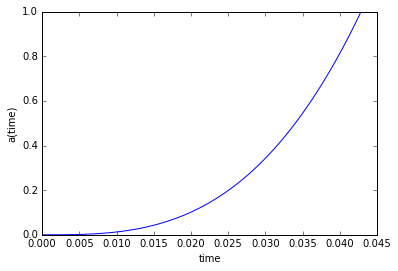

In [95]:
from decimal import Decimal, getcontext
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#Plotting the solution for a(t).
H = 70 #* (3.241*(10**-20)) Change units if needed. 
t_stop= Decimal(3)/Decimal(H)
t = np.linspace(0, float(t_stop), num = 100)
a = ((float(Decimal(H))*t)/float(Decimal(3)))**(3)
plt.plot(t,a)
plt.xlabel('time')
plt.ylabel('a(time)')


#Integrating the solution 
def integrand(t):
    return ((float(Decimal(H))*t)/float(Decimal(3)))**3
sol = integrate.quad(integrand, 0, float(Decimal(3))/float(Decimal(H)))
print 'area under the curve = ', sol[0]

#Testing the integration value with integrate.cumtrapz. Not as exact so it yields a slightly higher result.
y_int = integrate.cumtrapz(a,t, initial=0)
print 'area under the curve (cumtrapz) = ', np.sum(y_int)

#Testing the integration value when done in Mathematica. Seems to be as exact as the first test.
print 'area under the curve (mathematica) = ', Decimal(3)/Decimal(280)

#Finally, testing the integration value with Simpson's rule.
print 'area under the curve (simpsons rule) = ' , scipy.integrate.simps(a, t)
